In [101]:
import sys
sys.path.append("../")

In [102]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter
from utilities.result_utilities import get_filepath, get_filepath_additional, extract_figures, extract_stats, extract_lr

In [103]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sserif",
    "font.serif": ["cm"],
})

In [104]:
# dura = 'longest'
dura = 'results-gbsg'
# files = get_filepath(dura)
files = get_filepath_additional(dura)
print(files)


['../results-gbsg/CoxPH/training_log_MCoxPHCcentralSNoneC1L1.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCiidSNoneC4L1.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCiidSNoneC4L5.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCiidSNoneC4L20.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCiidSNoneC4L100.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCnoniidS0C4L1.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCnoniidS0C4L5.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCnoniidS0C4L20.txt', '../results-gbsg/CoxPH/training_log_MCoxPHCnoniidS0C4L100.txt', '../results-gbsg/NNph/training_log_MNNphCcentralSNoneC1L1.txt', '../results-gbsg/NNph/training_log_MNNphCiidSNoneC4L1.txt', '../results-gbsg/NNph/training_log_MNNphCiidSNoneC4L5.txt', '../results-gbsg/NNph/training_log_MNNphCiidSNoneC4L20.txt', '../results-gbsg/NNph/training_log_MNNphCiidSNoneC4L100.txt', '../results-gbsg/NNph/training_log_MNNphCnoniidS0C4L1.txt', '../results-gbsg/NNph/training_log_MNNphCnoniidS0C4L5.txt', '../

In [105]:
lrs = extract_lr(files)
for i, l in enumerate(lrs):
    if i % 9 in [0,1,5]:
        print(i, l)

0 0.1
1 0.1
5 0.1
9 0.01
10 0.1
14 0.1
18 0.01
19 0.1
23 0.01


In [106]:
concordances, briers = extract_figures(files)
for file in files:
    with open(file, 'r') as f:
        # print(file)
        lines = f.read().splitlines()
        last_line = lines[-1]
        # print(last_line)
        start = last_line.find('concordance: ') + len('concordance: ') 
        end = 10        
        concordance = float(last_line[start:start+end])
        concordances.append(concordance)
        # print(round(concordance * 100, 2))
        start = last_line.find('Brier: ') + len('Brier: ') 
        end = 10     
        brier = float(last_line[start:start+end])
        briers.append(brier)
        # print(round(brier * 100, 2))


In [107]:
indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)
dec = 2
for i in range(len(avg_concordances)):
    # print(concs)
    # print(f'{round(100*avg_concordances[i],dec):.1f} +- {round(100*std_concordances[i],dec):.1f}' )
    # print(brs)
    print(f'{round(100*avg_briers[i],dec):.3f} +- {round(100*std_briers[i],dec):.1f}' )        
    print(';')  

18.040 +- 0.5
;
18.090 +- 0.2
;
18.090 +- 0.2
;
18.140 +- 0.5
;
18.150 +- 0.3
;
20.430 +- 0.5
;
20.060 +- 0.5
;
20.350 +- 0.2
;
22.070 +- 0.3
;
18.200 +- 0.8
;
17.730 +- 0.3
;
17.800 +- 0.4
;
17.910 +- 0.8
;
19.840 +- 1.9
;
20.500 +- 0.6
;
20.640 +- 0.4
;
20.430 +- 0.2
;
22.310 +- 0.5
;
17.970 +- 0.4
;
18.330 +- 0.5
;
18.170 +- 0.6
;
18.690 +- 0.7
;
21.680 +- 1.5
;
23.620 +- 0.9
;
22.440 +- 0.8
;
21.740 +- 0.5
;
22.720 +- 1.0
;


In [108]:
indiv_concordances

[[0.69894879, 0.66917815, 0.64455382, 0.64157045, 0.6693161],
 [0.68661952, 0.65999238, 0.66977225, 0.66770248, 0.64082801],
 [0.65326834, 0.66596865, 0.66063911, 0.66714054, 0.67052406],
 [0.66534817, 0.68663394, 0.64435065, 0.67341664, 0.64292444],
 [0.64881514, 0.66671926, 0.64538378, 0.68321421, 0.67001229],
 [0.61215163, 0.60861124, 0.61277816, 0.62503844, 0.59625242],
 [0.63416851, 0.5669035, 0.64603499, 0.64186476, 0.6047828],
 [0.56320922, 0.50172569, 0.61047218, 0.61714916, 0.57114781],
 [0.5076037, 0.62991247, 0.66050782, 0.48203576, 0.54646023],
 [0.69853438, 0.66600712, 0.61873359, 0.6511671, 0.67514131],
 [0.68860232, 0.66979977, 0.67813051, 0.68824923, 0.64316968],
 [0.64836651, 0.67141047, 0.67514854, 0.67722245, 0.6818043],
 [0.65841961, 0.70932084, 0.65596689, 0.68220009, 0.6438928],
 [0.62248348, 0.64806122, 0.61782145, 0.68018874, 0.60692135],
 [0.62942808, 0.63775913, 0.61335446, 0.65280248, 0.53151305],
 [0.62874117, 0.56948985, 0.65528644, 0.62935303, 0.60722353],

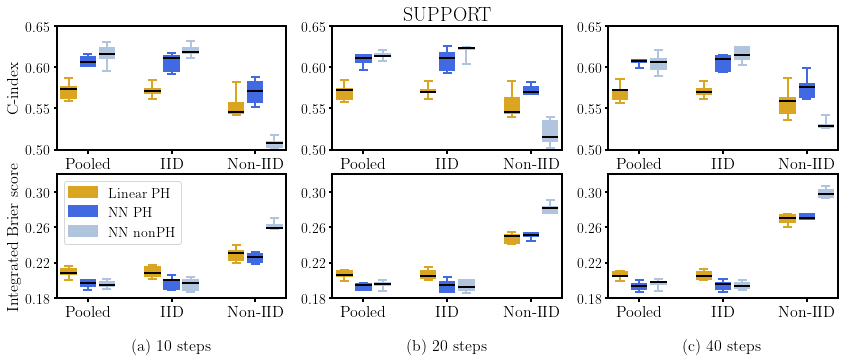

In [109]:
fig = plt.figure(1, figsize=(14, 5))

dataset = 'support'
titles = {'gbsg' : 'GBSG', 'metabric' : 'METABRIC', 'support' : 'SUPPORT'}
bots = {'gbsg' : [0.40,0.16], 'metabric' : [0.5,0.14], 'support' : [0.50,0.18]}
tops = {'gbsg' : [0.75,0.58], 'metabric' : [0.7,0.28], 'support' : [0.65,0.32]}
steps = {'gbsg' : 0.1, 'metabric' : 0.04, 'support' : 0.04}
duras = [f'results-{dataset}',f'results-{dataset}-20',f'results-{dataset}-40',f'results-{dataset}',f'results-{dataset}-20',f'results-{dataset}-40']
# duras = ['shorter', 'short','longest','shorter', 'short','longest']
lab = ['(a) 10 steps','(b) 20 steps','(c) 40 steps']

for idx in range(6):

    dura = duras[idx]
    files = get_filepath(dura)
    indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)

    if idx < 3:
        nums = indiv_concordances
    else:
        nums = indiv_briers

    # Create an axes instance
    ax = fig.add_subplot(2,3,1+idx)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Create the boxplot
    # base= 1 
    adj = 9
    colors = ['goldenrod','royalblue','lightsteelblue']
    bps = []
    for i,base in enumerate([0,1,5]):
        gap = 3.5
        base_pos = [1.2, 2, 2.8]
        positions = [base_pos[0] + gap*i, base_pos[1] + gap*i, base_pos[2] + gap*i]
        bp = ax.boxplot([nums[i] for i in [base,base+adj,base+2*adj]], whis=999, patch_artist=True, positions = positions, widths = 0.6)
        bps.append(bp)
        for j, box in enumerate(bp['boxes']):
            # change outline color
            box.set( color=colors[j], linewidth=2)
            # change fill color
            box.set( facecolor = colors[j] )

        for j, whisker in enumerate(bp['whiskers']):
            whisker.set(color=colors[j//2], linewidth=2)
        for j,cap in enumerate(bp['caps']):
            cap.set(color=colors[j//2], linewidth=2)

        for median in bp['medians']:
            median.set(color='black', linewidth=2)

        for flier in bp['fliers']:
            flier.set(marker='D', color='black', alpha=0.5)
    if idx < 3:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', 'IID','Non-IID'])
    else:
        if dataset == 'gbsg':
            plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', f'IID \n \n {lab[idx-3]}','Non-IID'])
        else:
            plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', f'IID \n \n {lab[idx-3]}','Non-IID'])
            # plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', 'IID','Non-IID'])
    plt.tick_params(axis='x',labelsize=16, width=2)
    plt.tick_params(axis='y',labelsize=14,width=2)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.set_xticklabels(['A', 'B', 'C'])
    # ax.set_xticks([2, 2+4, 2+2*4])
    if idx < 3:
        x1,x2,y1,y2 = ax.axis()  
        bot = bots[dataset][0]
        top = tops[dataset][0]
        ax.axis((x1,x2,bot,top))
    else:
        x1,x2,y1,y2 = ax.axis()  
        bot = bots[dataset][1]
        top = tops[dataset][1]
        step = steps[dataset]
        ax.axis((x1,x2,bot,top))    
        ax.set_yticks(np.arange(bot,top,step))
    
    if idx == 0:
        plt.ylabel(ylabel='C-index', fontsize=16)
    if idx == 1:
        plt.title(f'{titles[dataset]}',fontsize=20)
    # if idx == 2:
        # ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear CoxPH', 'NN CoxPH', 'NN LogHaz'], loc='lower left',fontsize=14)
    if idx == 3:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear PH', 'NN PH', 'NN nonPH'], loc='upper left',fontsize=14)
        plt.ylabel(ylabel='Integrated Brier score', fontsize=16)
fig.savefig(f'../figs/duration_flex_{dataset}.eps', bbox_inches='tight', dpi=600, format='eps')



In [110]:
fig = plt.figure(1, figsize=(12, 7))

duras = ['shorter', 'short','longest','shorter', 'short','longest']
lab = ['(a)','(b)','(c)']
for idx in range(6):

    dura = duras[idx]
    files = get_filepath(dura)
    indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)

    if idx < 3:
        nums = indiv_concordances
    else:
        nums = indiv_briers

    # Create an axes instance
    ax = fig.add_subplot(2,3,1+idx)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    # Create the boxplot
    # base= 1 
    adj = 9
    colors = ['goldenrod','royalblue','lightsteelblue']
    bps = []
    for i,base in enumerate([0,1,5]):
        gap = 3.5
        base_pos = [1.2, 2, 2.8]
        positions = [base_pos[0] + gap*i, base_pos[1] + gap*i, base_pos[2] + gap*i]
        bp = ax.boxplot([nums[i] for i in [base,base+adj,base+2*adj]], whis=999, patch_artist=True, positions = positions, widths = 0.6)
        bps.append(bp)
        for j, box in enumerate(bp['boxes']):
            # change outline color
            box.set( color=colors[j], linewidth=2)
            # change fill color
            box.set( facecolor = colors[j] )

        for j, whisker in enumerate(bp['whiskers']):
            whisker.set(color=colors[j//2], linewidth=2)
        for j,cap in enumerate(bp['caps']):
            cap.set(color=colors[j//2], linewidth=2)

        for median in bp['medians']:
            median.set(color='black', linewidth=2)

        for flier in bp['fliers']:
            flier.set(marker='D', color='black', alpha=0.5)
    if idx < 3:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', 'IID','Non-IID'])
    else:
        plt.xticks([base_pos[1], base_pos[1]+gap, base_pos[1]+2*gap],['Pooled', f'IID \n \n {lab[idx-3]}','Non-IID'])
    plt.tick_params(axis='x',labelsize=16, width=2)
    plt.tick_params(axis='y',labelsize=14,width=2)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    # ax.set_xticklabels(['A', 'B', 'C'])
    # ax.set_xticks([2, 2+4, 2+2*4])
    if idx < 3:
        x1,x2,y1,y2 = ax.axis()  
        ax.axis((x1,x2,0.55,0.76))
    else:
        x1,x2,y1,y2 = ax.axis()  
        ax.axis((x1,x2,0.15,0.27))    
        ax.set_yticks(np.arange(0.15,0.27,0.04))
    
    if idx == 0:
        plt.ylabel(ylabel='C-index', fontsize=16)
    if idx == 2:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear PH', 'NN PH', 'NN nonPH'], loc='lower left',fontsize=14)
    if idx == 3:
        ax.legend([bps[0]["boxes"][0], bps[0]["boxes"][1], bps[0]["boxes"][2]],['Linear PH', 'NN PH', 'NN nonPH'], loc='upper left',fontsize=14)
        plt.ylabel(ylabel='Integrated Brier score', fontsize=16)
fig.savefig('../figs/duration_flex.eps', bbox_inches='tight')



FileNotFoundError: [Errno 2] No such file or directory: '../shorter/CoxPH/training_log_MCoxPHCcentralSNoneC1L1.txt'

<Figure size 864x504 with 0 Axes>